### convolutional neural network : 

#### Importing the necessary libraries: 


In [1]:
# Libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Viewing the dataset: 

##### Dogs: Training set

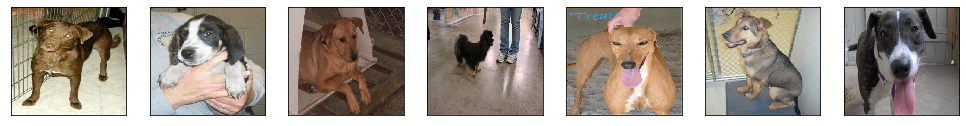

In [14]:
# Dogs:

# Importing the image library: 
import matplotlib.image as mpimg
import os 
# Extracting the contents within the directory:
path = 'dataset/training_set/dogs'
data = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore the hidden files

# Converting the extracted data into numpy array:
store = []
# Plotting only 7 images:
# To see all the pictues use len(store) replacing the number 7
for i in range(0, 7):
    store.append(mpimg.imread(path+'/'+data[i]))
    
# Plotting the pictures:    
f, axes = plt.subplots(ncols = len(store),figsize=(17, 2))
for i in range(0,7):
    axes[i].imshow(store[i],interpolation='nearest', aspect='auto')

# Code to remove the x and y axis labels.     
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

##### Cats: Training set

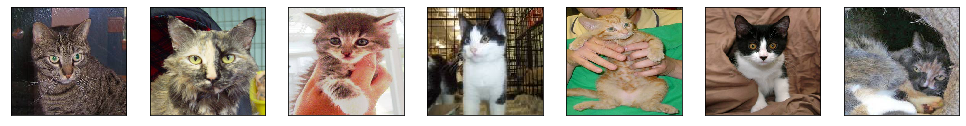

In [15]:
# cats:

# Importing the image library: 
#import matplotlib.image as mpimg
#import os 
# Extracting the contents within the directory:
path = 'dataset/training_set/cats'
data = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore the hidden files

# Converting the extracted data into numpy array:
store = []
# Plotting only 7 images:
# To see all the pictues use len(store) replacing the number 7
for i in range(0, 7):
    store.append(mpimg.imread(path+'/'+data[i]))
    
# Plotting the pictures:    
f, axes = plt.subplots(ncols = len(store),figsize=(17, 2))
for i in range(0,7):
    axes[i].imshow(store[i],interpolation='nearest', aspect='auto')

# Code to remove the x and y axis labels.     
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

##### Test set: 

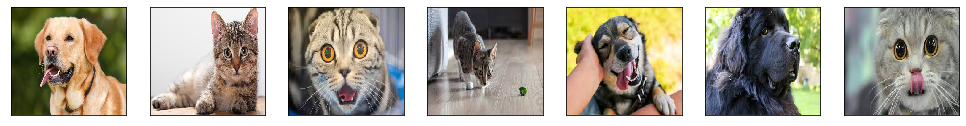

In [16]:
# Importing the image library: 
#import matplotlib.image as mpimg
#import os 
# Extracting the contents within the directory:
path = 'dataset/single_prediction/Game'
data = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore the hidden files

# Converting the extracted data into numpy array:
store = []
for i in range(0, len(data)):
    store.append(mpimg.imread(path+'/'+data[i]))
    
# Plotting the pictures:    
f, axes = plt.subplots(ncols = len(store),figsize=(17, 2))
for i in range(0,len(store)):
    axes[i].imshow(store[i],interpolation='nearest', aspect='auto')

# Code to remove the x and y axis labels.     
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

#### Building the Model:

In [2]:
# Extracting the required libraries: 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
# Initializing the model: 
classifer = Sequential()

# Defining the convolutional layer: 
classifer.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)))
# Adding a maxpooling layer: 
classifer.add(MaxPooling2D(pool_size=(2, 2), strides = (1,1)))

# Adding a second convolutional and pooling layer:
classifer.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
classifer.add(MaxPooling2D(strides = (1,1)))

# Adding the flattening layer: 
classifer.add(Flatten())

# Adding the fully connected layer: 
classifer.add(Dense(units = 128, activation = 'relu'))
classifer.add(Dense(units = 1, activation = 'sigmoid'))
# Building the back propagation: 
classifer.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### Fitting the model:

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

classifer.fit_generator(
        train_generator,
        steps_per_epoch=8000,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
8000/8000 [==============================] - 3110s 389ms/step - loss: 0.3731 - accuracy: 0.8214 - val_loss: 0.9725 - val_accuracy: 0.7808
Epoch 2/10
8000/8000 [==============================] - 6906s 863ms/step - loss: 0.1018 - accuracy: 0.9624 - val_loss: 1.1370 - val_accuracy: 0.7694
Epoch 3/10
8000/8000 [==============================] - 3662s 458ms/step - loss: 0.0551 - accuracy: 0.9807 - val_loss: 1.0012 - val_accuracy: 0.7612
Epoch 4/10
8000/8000 [==============================] - 3662s 458ms/step - loss: 0.0400 - accuracy: 0.9864 - val_loss: 2.1719 - val_accuracy: 0.7867
Epoch 5/10
8000/8000 [==============================] - 3881s 485ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.8427 - val_accuracy: 0.7799
Epoch 6/10
8000/8000 [==============================] - 3948s 493ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 2.8836 - val_accuracy: 0.7800
Epoch 7/10
8000/8000 [

#### Saving the mode: 

In [17]:
classifer.save('cnn.h5')

#### Loading the model: 

In [6]:
# Loading of the file is not needed in the same file, but its handy in when being used in a different projects: 
# This is put here as an example
from keras.models import load_model
model = load_model('cnn.h5')

#### Viewing the model:

In [3]:
# The structure of the whole model:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 107648)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               13779072  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [6]:
# Input layer: 
model.input

<tf.Tensor 'conv2d_6_input:0' shape=(None, 64, 64, 3) dtype=float32>

In [7]:
# Output layers: 
model.output

<tf.Tensor 'dense_2/Sigmoid:0' shape=(None, 1) dtype=float32>

### Making the predictions: 

In [10]:
# Creating a game folder: 
from keras.preprocessing.image import ImageDataGenerator
path = 'dataset/test_set/'
test_batch = ImageDataGenerator().flow_from_directory(directory=path, classes=['dogs','cats'], target_size=(64,64))

Found 2000 images belonging to 2 classes.


In [11]:
# Making the prediction: 
y_pred = model.predict_generator(test_batch)

In [12]:
# Finding the lables assigned to the pictures: 
test_batch.class_indices

{'dogs': 0, 'cats': 1}

In [13]:
# Viewing the prediction: 
y_pred 

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [14]:
y_pred = (y_pred > 0.5).astype(int)

In [17]:
y_pred = np.array(y_pred)

In [18]:
# Vewing the resutl: 
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([ 913, 1087], dtype=int64))

### Prediction on other images: 

In [30]:
# Creating a game folder: 
from keras.preprocessing.image import ImageDataGenerator
path = 'dataset/single_prediction/'
test_batch_game = ImageDataGenerator().flow_from_directory(directory=path, classes=['Game'], target_size=(64,64))

Found 7 images belonging to 1 classes.


In [31]:
y_pred_game = model.predict_generator(test_batch_game)

In [32]:
# Seeing the prediction of the 7 images above: 
y_pred_game

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [34]:
y_pred_game = np.array(y_pred_game > 0.5).astype(int)

In [36]:
# Final Prediction: 
y_pred_game

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])